In [107]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [66]:
btc = ['BTC-USD']
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2022, 1, 1)
btc_prices = yf.download(btc, start, end, interval = '1d').Close 

[*********************100%***********************]  1 of 1 completed


In [26]:
btc_prices = btc_prices.dropna()

In [71]:
stat_test = adfuller(btc_prices)[0:2]
print("The ADF test statistic and p-value of {} are {}".format(btc, stat_test))

The ADF test statistic and p-value of ['BTC-USD'] are (-1.0478468734375652, 0.7354159361561465)


In [89]:
diff_btc = btc_prices.diff().dropna()
diff_btc.head()

Date
2020-01-02   -214.704102
2020-01-03    359.414062
2020-01-04     65.772461
2020-01-05      0.660645
2020-01-06    357.901855
Name: Close, dtype: float64

In [90]:
split = int(len(diff_btc.values) * 0.90) 
train_btc = diff_btc.iloc[:split] 
test_btc = diff_btc.iloc[split:] 


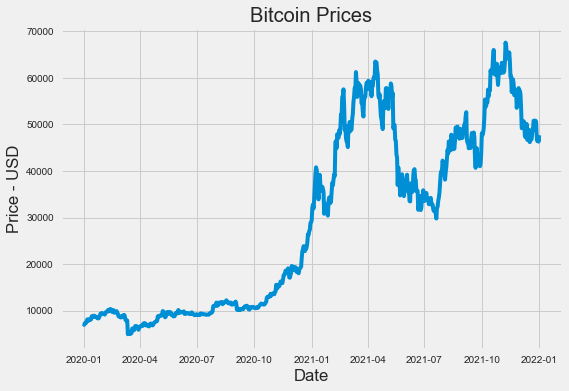

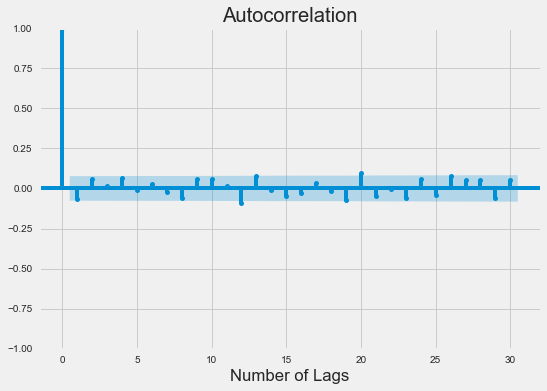

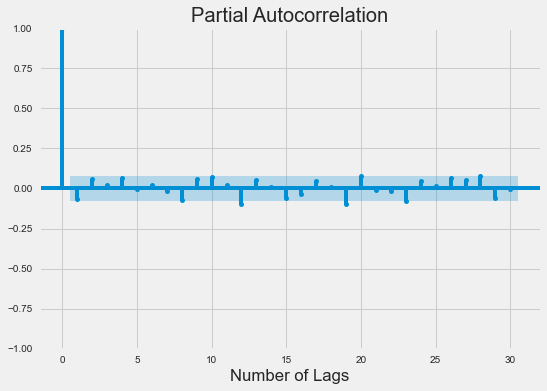

In [94]:
plt.plot(btc_prices)
plt.title('Bitcoin Prices')
plt.ylabel('Price - USD')
plt.xlabel('Date')
plt.show()

sm.graphics.tsa.plot_acf(train_btc, lags = 30)
plt.xlabel('Number of Lags')
plt.show()

sm.graphics.tsa.plot_pacf(train_btc, lags = 30)
plt.xlabel('Number of Lags')
plt.show()

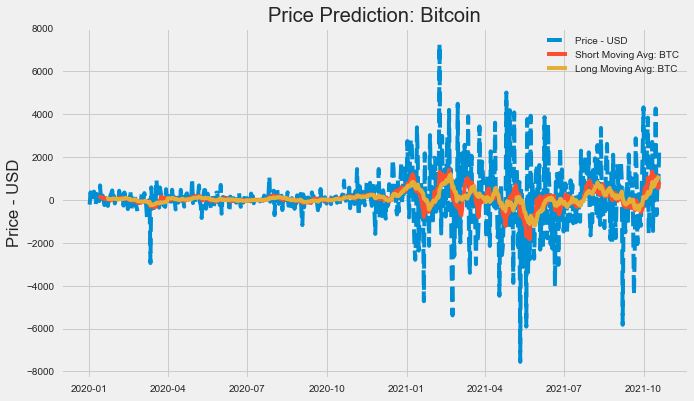

In [93]:
sma_btc = train_btc.rolling(window = 12).mean()
lma_btc = train_btc.rolling(window = 20).mean() 

fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(train_btc.loc[start:end].index,
    train_btc.loc[start:end],
    label = 'Price - USD', linestyle='--') 
ax.plot(sma_btc.loc[start:end].index,
    sma_btc.loc[start:end],
    label = 'Short Moving Avg: BTC', linestyle='solid') 
ax.plot(lma_btc.loc[start:end].index,
    lma_btc.loc[start:end],
    label = 'Long Moving Avg: BTC', linestyle='solid') 
ax.legend(loc = 'best')
ax.set_ylabel('Price - USD')
ax.set_title('Price Prediction: Bitcoin')
plt.show()

In [95]:
ar_btc = AutoReg(train_btc.values, lags = 28)
ar_fit_btc = ar_btc.fit()

In [96]:
ar_predict_btc = ar_fit_btc.predict(start = len(train_btc), end = len(train_btc) + len(test_btc) - 1,
                                   dynamic = False)

In [104]:
for i in range(len(ar_predict_btc)):
    print('==' * 25)
    print('Predicted Price:{:.4f}   Actual Price:{:.4f}'.format(ar_predict_btc[i], test_btc[i]))

Predicted Price:117.6870   Actual Price:1730.8438
Predicted Price:499.9850   Actual Price:-3782.6641
Predicted Price:-362.5027   Actual Price:-1517.9062
Predicted Price:-276.0260   Actual Price:701.3516
Predicted Price:124.1397   Actual Price:-462.7812
Predicted Price:156.0876   Actual Price:2108.9883
Predicted Price:348.6361   Actual Price:-2676.0312
Predicted Price:-195.1373   Actual Price:-1881.4062
Predicted Price:800.5409   Actual Price:2139.7500
Predicted Price:264.0301   Actual Price:1605.8281
Predicted Price:109.3729   Actual Price:-339.1328
Predicted Price:445.7183   Actual Price:-569.8750
Predicted Price:456.0791   Actual Price:-314.5508
Predicted Price:361.3184   Actual Price:2221.9961
Predicted Price:-265.6535   Actual Price:-256.3555
Predicted Price:679.6476   Actual Price:-1517.8164
Predicted Price:-193.0888   Actual Price:-326.5547
Predicted Price:358.1196   Actual Price:401.8047
Predicted Price:-257.0296   Actual Price:1799.5078
Predicted Price:734.3407   Actual Price:4

In [105]:
ar_predict_btc = pd.DataFrame(ar_predict_btc)
ar_predict_btc.index = test_btc.index

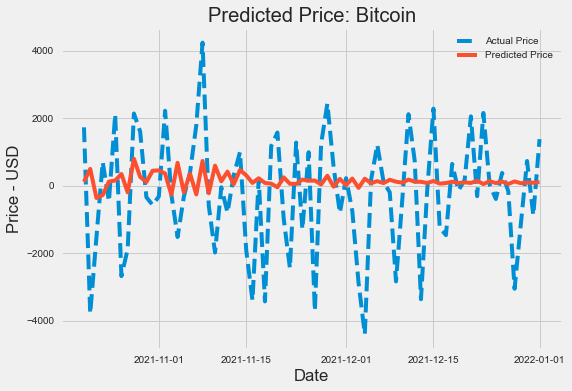

In [106]:
plt.plot(test_btc, label = 'Actual Price', linestyle='--')
plt.plot(ar_predict_btc, linestyle='solid', label = "Predicted Price")
plt.title('Predicted Price: Bitcoin')
plt.legend(loc = 'best')
plt.xlabel('Date')
plt.ylabel('Price - USD')
plt.show()

In [109]:
arima_btc = ARIMA(train_btc, order = (12,1,12))
arima_fit_btc = arima_btc.fit()

In [110]:
arima_predict_btc = arima_fit_btc.predict(start = len(train_btc), end = len(train_btc) + len(test_btc) - 1,
                                          dynamic = False)

In [111]:
arima_predict_btc = pd.DataFrame(arima_predict_btc)
arima_predict_btc.index = test_btc.index

AttributeError: 'Text' object has no property 'rotate'

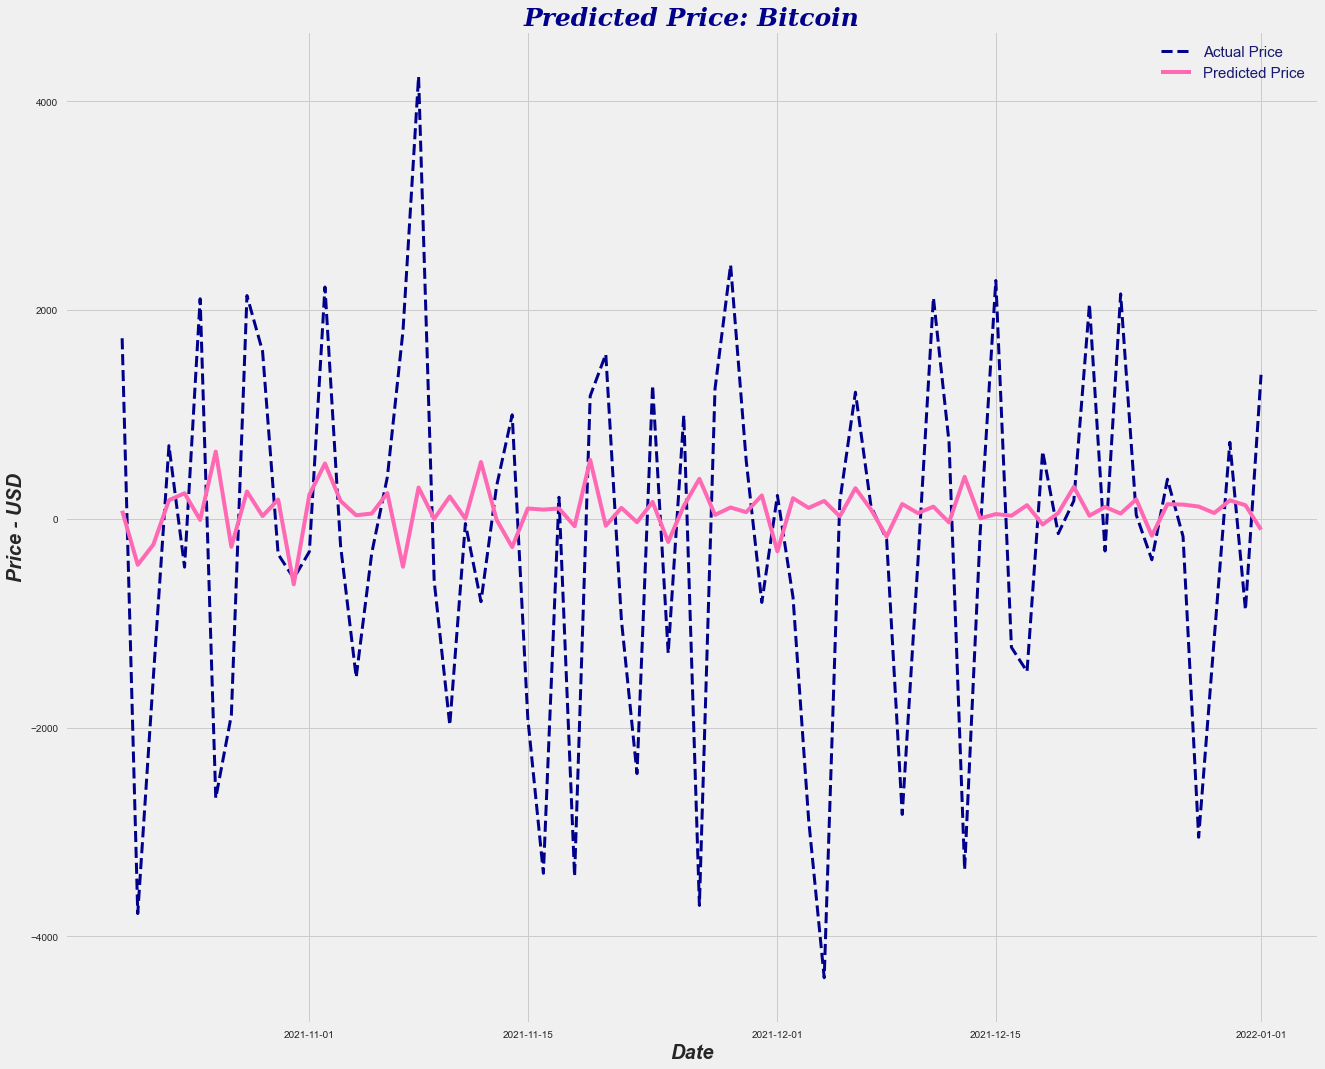

In [150]:
plt.figure(figsize = (20, 17))
plt.plot(test_btc, label = 'Actual Price', linestyle='--', c = 'darkblue', lw = 3)
plt.plot(arima_predict_btc, linestyle='solid', label = "Predicted Price", c = 'hotpink')
plt.title('Predicted Price: Bitcoin', family = 'serif', size = 30, c = 'darkblue', 
          fontstyle = 'italic', fontweight = 'extra bold')
plt.legend(loc = 'best', fontsize = 15, labelcolor = 'midnightblue')
plt.xlabel('Date', fontweight = 'bold', fontstyle = 'italic', fontsize = 20)
plt.ylabel('Price - USD', fontweight = 'bold', fontstyle = 'italic', fontsize = 20, rotate = 'horizontal')
plt.xticks(fontsize = 13, fontweight = 'semibold', )
plt.show()